In [212]:
import pandas as pd
import numpy as np

In [213]:
covid_19_India = pd.read_csv('/home/Soma/Documents/PGD/Project/Datasets/covid_19_india.csv')
covid_19_India.head(6)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3


In [214]:
from dateutil.parser import parse
# design our data
India_covid_19 = covid_19_India.iloc[:,6:]
India_covid_19['Date'] =covid_19_India['Date'].apply(parse, dayfirst=True)

India_covid_19.head(6)

,Cured,Deaths,Confirmed,Date
0,0,0,1,2020-01-30
1,0,0,1,2020-01-31
2,0,0,2,2020-02-01
3,0,0,3,2020-02-02
4,0,0,3,2020-02-03
5,0,0,3,2020-02-04


In [215]:
India_covid_19= India_covid_19.groupby(by='Date', axis=0)['Cured', 'Deaths','Confirmed'].sum().reset_index()
India_covid_19.head(6)

<ipython-input-215-d32aba030ae4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  India_covid_19= India_covid_19.groupby(by='Date', axis=0)['Cured', 'Deaths','Confirmed'].sum().reset_index()


,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3
5,2020-02-04,0,0,3


In [216]:
data=India_covid_19.filter(['Date', 'Confirmed'])
data.head(6)

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
5,2020-02-04,3


In [217]:
#covert dataframe to array
data = data.set_index(['Date'])
dataset = data.values
#dataset
print(len(dataset))

92


In [218]:
from sklearn.preprocessing import MinMaxScaler
#preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(len(scaled_data))

92


In [219]:
#create training data
train_data = scaled_data[0:len(dataset), :]
print(len(train_data))

92


In [220]:

X_train, Y_train = [], []
for i in range(10, len(dataset)):
    X_train.append(train_data[i-10:i,0])
    Y_train.append(train_data[i,0])
   

In [221]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [222]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [223]:
X_train.shape

(82, 10, 1)

In [224]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM

In [225]:
model = Sequential()
 
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [226]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [227]:
model.fit(X_train, Y_train, batch_size=1, epochs=10)

Epoch 1/10
82/82 [==============================] - 4s 47ms/step - loss: 0.0255
Epoch 2/10
82/82 [==============================] - 2s 24ms/step - loss: 0.0077
Epoch 3/10
82/82 [==============================] - 2s 25ms/step - loss: 9.9956e-04
Epoch 4/10
82/82 [==============================] - 2s 25ms/step - loss: 7.6544e-04
Epoch 5/10
82/82 [==============================] - 2s 26ms/step - loss: 0.0014
Epoch 6/10
82/82 [==============================] - 2s 26ms/step - loss: 4.4977e-04
Epoch 7/10
82/82 [==============================] - 2s 26ms/step - loss: 3.9031e-04
Epoch 8/10
82/82 [==============================] - 2s 25ms/step - loss: 2.4240e-04
Epoch 9/10
82/82 [==============================] - 2s 26ms/step - loss: 3.2621e-04
Epoch 10/10
82/82 [==============================] - 2s 25ms/step - loss: 2.5732e-04


In [228]:
test_data = scaled_data[-len(dataset):,:]
print(len(test_data))

92


In [229]:
X_test = []
Y_test = dataset[-len(test_data):-10,:]
Y_test.shape

(82, 1)

In [230]:
for i in range(10, len(test_data)):
    X_test.append(test_data[i-10:i,0])

In [231]:
X_test = np.array(X_test)

In [232]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [233]:
X_test.shape

(82, 10, 1)

In [234]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
pred.shape

(82, 1)

In [235]:
train= data[:len(dataset)]
train.head()

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-02,3
2020-02-03,3


In [236]:
valid = data[10:]
valid.shape

(82, 1)

In [237]:
valid['prediction'] = pred

<ipython-input-237-f44d142e77b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = pred


In [238]:
valid

,Confirmed,prediction
Date,,
2020-02-09,3,-75.541595
2020-02-10,3,-74.996193
2020-02-11,3,-74.465469
2020-02-12,3,-74.205040
2020-02-13,3,-74.205040
...,...,...
2020-04-26,26605,28898.162109
2020-04-27,28160,30411.593750
2020-04-28,29834,31901.335938


In [242]:
import sklearn.metrics as mt
import math

mse = mt.mean_squared_error(pred, Y_test)
rmse = math.sqrt(mse)
#RMSE value
rmse

6485.278808288004

In [243]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Y_test, pred)
reg.score(Y_test, pred)
#R squared value

0.9694763985863468

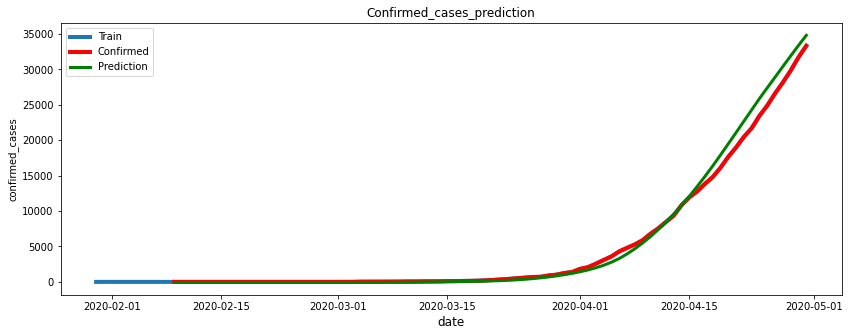

In [244]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.title('Confirmed_cases_prediction')
plt.xlabel("date", fontsize=12)
plt.ylabel('confirmed_cases')
plt.plot(train['Confirmed'],linewidth=4)
plt.plot(valid['Confirmed'],color='red',linewidth=4)
plt.plot(valid['prediction'],color='green',linewidth=3)
plt.legend(['Train', 'Confirmed', 'Prediction'], loc='upper left')
plt.show()